In [1]:
import numpy as np
import matplotlib.pyplot as plt

l_barrel = 1.234 #m
d_barrel = 0.2 #m

l_sabot = 0.03 #m
mu_sabot = 0.04

m_payload = 6 #kg

vol_chamber = 0.015 #m^3
p_chamber = 20e5 #Pa
t_chamber = 300 #K
gamma = 1.4

dt = 0.00003

a_b = d_barrel**2 * np.pi / 4

def step(t, f, a, v, l, vol, p, temp):
    global dt
    ft = a_b * p - mu_sabot*d_barrel*np.pi*l_sabot*p
    at = ft / m_payload
    vt = v + at*dt
    lt = l + vt*dt
    volt = vol + vt*dt*a_b
    pt = p * (vol/volt)**gamma
    tt = t+dt
    tempt = t_chamber * (vol_chamber/vol)**(gamma-1)
    return tt, ft, at, vt, lt, volt, pt, tempt

data = [(
    0, 0, 0, 0, 0, vol_chamber, p_chamber, t_chamber,
),]

In [6]:
i = 0
while True:
    erg = step(*data[-1])
    data.append(erg)
    if data[-1][4] > l_barrel:
        break

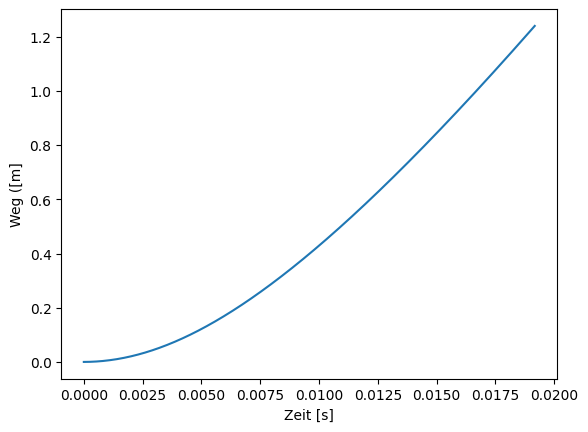

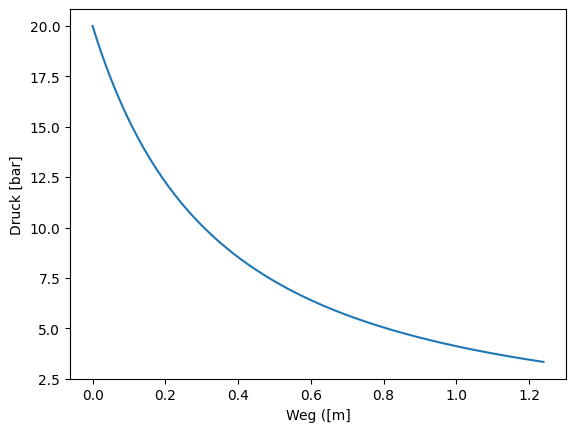

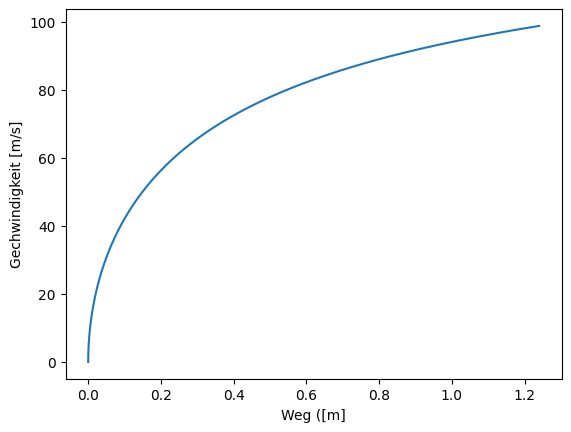

In [7]:
tt, ft, at, vt, lt, volt, pt, tempt = np.transpose(data)

plt.plot(tt, lt)
plt.ylabel("Weg ([m]")
plt.xlabel("Zeit [s]")
plt.show()

plt.plot(lt, pt/1e5)
plt.xlabel("Weg ([m]")
plt.ylabel("Druck [bar]")
plt.show()

plt.plot(lt, vt)
plt.xlabel("Weg ([m]")
plt.ylabel("Gechwindigkeit [m/s]")
plt.show()

In [8]:
print(data[-1])

(0.01916999999999995, 10242.940649142005, 1707.1567748570008, 98.85417348647462, 1.2398047868237958, 0.053949616101710986, 333252.9912050439, 179.91305362011875)
